In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import warnings

warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)
input_path = '../input/'
df = pd.read_csv(os.path.join(input_path, 'train.csv'))

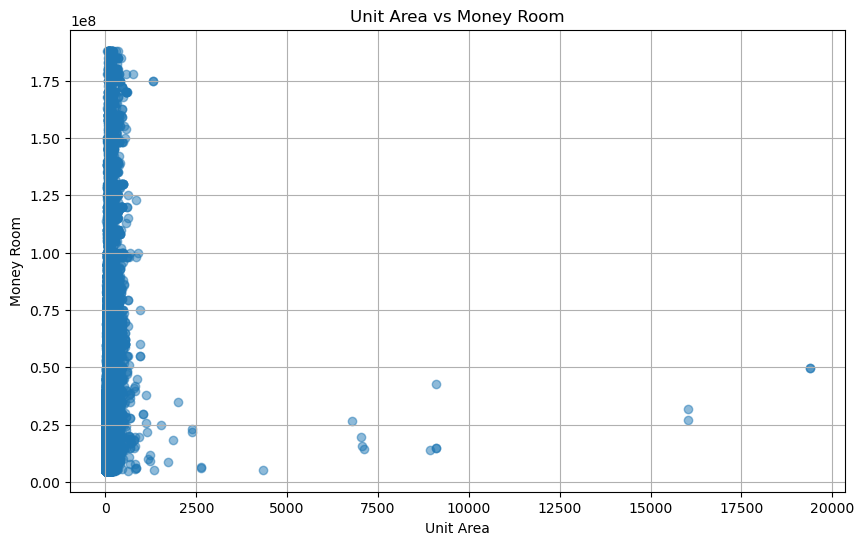

In [ ]:
df.head()




Data shape after removing outliers: (316850, 151)


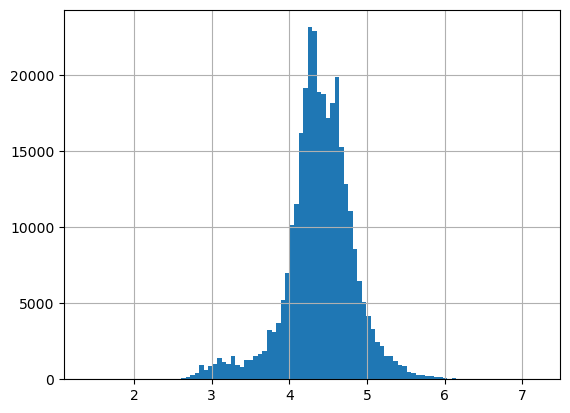

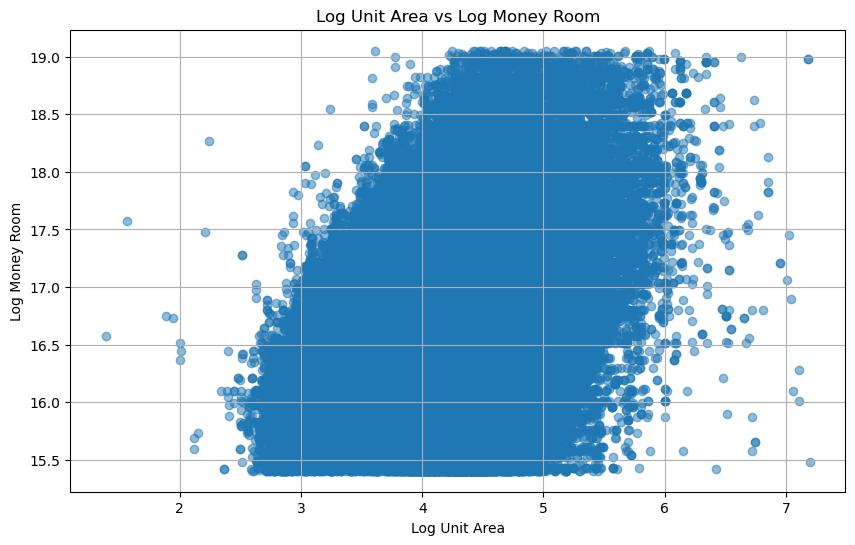

                log_unit_area  log_money_room
log_unit_area        1.000000        0.220154
log_money_room       0.220154        1.000000


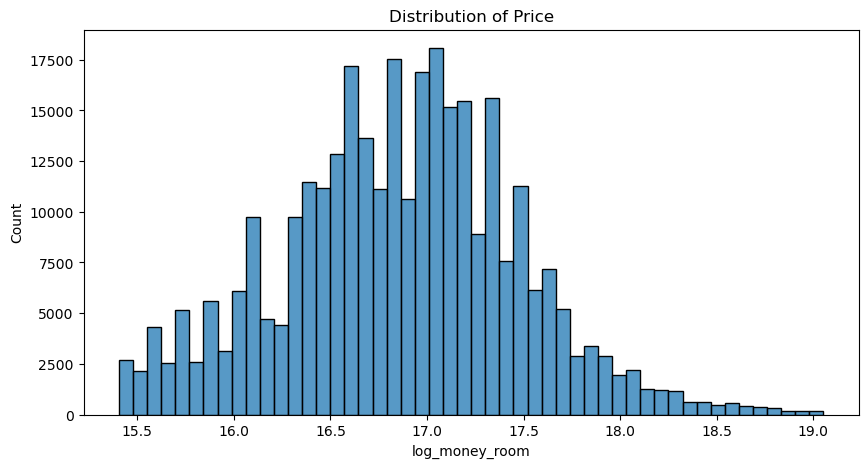

In [ ]:
# 面積(unit_area)が大きい順に上位10件を表示
#print(df[['unit_area', 'money_room', 'building_type']].sort_values(by='unit_area', ascending=False).head(20))

treshold = 1500
#裾が広すぎるので両方log変換
df['log_money_room'] = np.log1p(df['money_room'])

#ハズレ地の除去
df = df[df['unit_area'] < treshold]
df['log_unit_area'] = np.log1p(df['unit_area'])
df['log_unit_area'].hist(bins=100)
print(f"Data shape after removing outliers: {df.shape}")

plt.figure(figsize=(10, 6))
plt.scatter(df['log_unit_area'], df['log_money_room'], alpha=0.5)
plt.title('Log Unit Area vs Log Money Room')
plt.xlabel('Log Unit Area')
plt.ylabel('Log Money Room')
plt.grid(True)
plt.show()
print(df[['log_unit_area', 'log_money_room']].corr())
plt.figure(figsize=(10, 5))
sns.histplot(df['log_money_room'], bins=50)
plt.title('Distribution of Price')
plt.show()

両対数変換を施すことによりデータの裾はいい感じになったが，相関係数が低い
## 東京都に絞って再調査

In [34]:
# 東京のデータのみを見る
# 1. 都道府県で一番データが多い場所（たぶん東京都）を特定
top_pref = df['addr1_1'].value_counts().index[0]
print(f"検証する都道府県: {top_pref}")

# 2. その都道府県だけのデータを取り出す
tokyo_df = df[df['addr1_1'] == top_pref]
# 13 = tokyo
# 3. その中での「面積」と「価格」の相関を見る
corr_val = tokyo_df[['log_unit_area', 'log_money_room']].corr().iloc[0, 1]
print(f"全体での相関: {df[['log_unit_area', 'log_money_room']].corr().iloc[0, 1]:.3f}")
print(f"{top_pref}だけの相関: {corr_val:.3f}")

検証する都道府県: 13
全体での相関: 0.220
13だけの相関: 0.525


かなり相関係数に向上が見られた．
そろそろ国土地理院の情報をつかおう